#### Hierarchical Clustering

Grouping n observations into k clusters

* Set every observation as an independent cluster
* **for example** 6 observations = C1(1), C2(1), C3(1), C4(1), C5(1), C6(1)
* Merge clusters based on the closest Euclidean Distance (C1(2), C2(2), C3(1), C4(1))
* Euclidean Distance (Observation, Center) = sqrt((Ox - Cx)² + (Oy - Cy)²)
* Repeat merge clusters until we have one cluster (C1(3), C2(3)) => (C1(6))
* Draw the dendogram based on all clusters we created

In [2]:
import numpy as np

data = np.array([
  [1, 2],
  [3, 2],
  [9, 1],
  [3, 7],
  [7, 2],
  [9, 7],
  [4, 8],
  [8, 3],
  [1, 4]
])

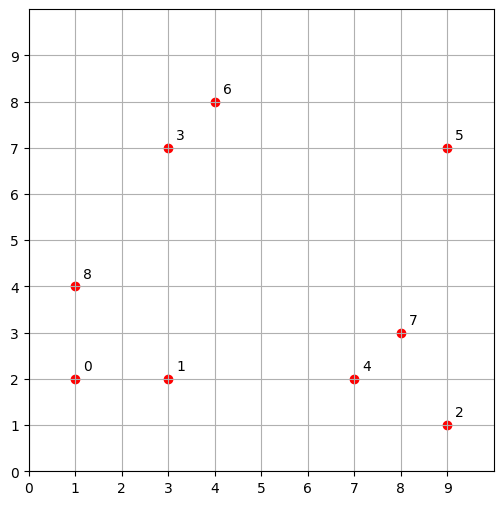

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.xlim([0, 10])
plt.xticks(range(10))
plt.ylim([0, 10])
plt.yticks(range(10))

plt.scatter(data[:, 0], data[:, 1], color = "red")
plt.grid()

# show index for each example
for i in range(len(data)):
  plt.annotate(i, xy = (data[i, 0], data[i, 1]), textcoords = "offset points", xytext = (6, 6))

#### Linkage Methods

**Single**: determines the distance between two clusters as the shortest distance between any two points in the two clusters.

<u>Sensitive to outliers and noise, works well with clean data.</u>

**Complete**: determines the distance between two clusters as the longest distance between any two points in the two clusters.

<u>Less sensitive to outliers and noise in the data.</u>

**Average**: determines the distance between two clusters as the average distance between all pairs of points in the two clusters.

<u>Between single and complete linkages.</u>

**Ward**: determines the distance between two clusters by minimising the increase in variance when the two clusters are merged.

<u>The most used. Similar to K-Means.</u>

In [20]:
from scipy.cluster.hierarchy import linkage

single_linkage = linkage(data, method = "single", metric="euclidean")
complete_linkage = linkage(data, method = "complete", metric="euclidean")
average_linkage = linkage(data, method = "average", metric="euclidean")
ward_linkage = linkage(data, method = "ward", metric="euclidean")

#### Find the best clusters number for each linkage method

For each dendrogram:

* Find the longest draw of parallel vertical lines
* Draw a horizontal line that cross them
* Count the clusters

**Single**: (4), **Complete**: (4), **Average**: (4), **Ward**: (2)

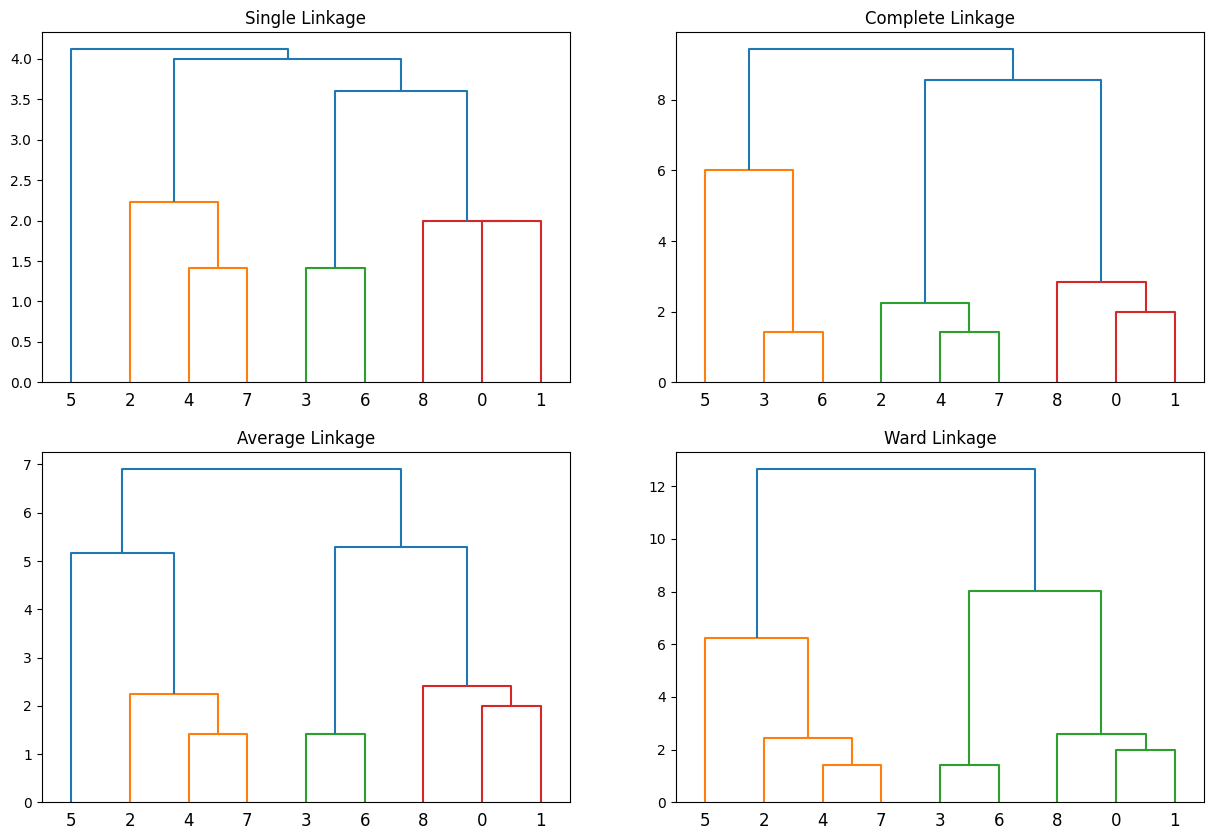

In [18]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1), dendrogram(single_linkage), plt.title("Single Linkage")
plt.subplot(2, 2, 2), dendrogram(complete_linkage), plt.title("Complete Linkage")
plt.subplot(2, 2, 3), dendrogram(average_linkage), plt.title("Average Linkage")
plt.subplot(2, 2, 4), dendrogram(ward_linkage), plt.title("Ward Linkage")

plt.show()

#### Hierarchical Clustering with SciPy

In [24]:
from scipy.cluster.hierarchy import fcluster

# best clusters number we calculate above for ward linkage
max_number_of_clusters = 2

# return the cluster number that each example belongs to
fcluster(ward_linkage, max_number_of_clusters, criterion = "maxclust")

array([2, 2, 1, 2, 1, 1, 2, 1, 2], dtype=int32)

#### Hierarchical Clustering with sklearn

In [26]:
from sklearn.cluster import AgglomerativeClustering

# best clusters number we calculate above for ward linkage
n_clusters = 2

model = AgglomerativeClustering(n_clusters, linkage = "ward")

model.fit_predict(data)

# return the cluster index that each example belongs to
model.labels_

array([0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)